In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, cos, sin, pi, Matrix, N


In [7]:

# Define symbolic variables for angles and dimensions
theta_1, theta_2, theta_3, theta_4, theta_5 = sp.symbols("theta_1 theta_2 theta_3 theta_4 theta_5")
d_1, d_5 = sp.symbols("d_1 d_5")  # d_5 for the last joint
a_2, a_3 = sp.symbols("a_2 a_3")  # a_2 and a_3 for the lengths of the second and third links

# Alpha values in degrees, with an updated value for alpha_4
alpha = [90, 0, 0, 90, 0] 

# Helper function to create a transformation matrix from DH parameters
def dh_matrix(theta, d, a, alpha):
    alpha_rad = sp.rad(alpha)  # Convert alpha from degrees to radians
    return sp.Matrix([
        [sp.cos(theta), -sp.sin(theta) * sp.cos(alpha_rad), sp.sin(theta) * sp.sin(alpha_rad), a * sp.cos(theta)],
        [sp.sin(theta),  sp.cos(theta) * sp.cos(alpha_rad), -sp.cos(theta) * sp.sin(alpha_rad), a * sp.sin(theta)],
        [0, sp.sin(alpha_rad), sp.cos(alpha_rad), d],
        [0, 0, 0, 1]
    ])

# Create transformation matrices for each joint using the updated parameters
A1 = dh_matrix(theta_1, d_1, 0, alpha[0])
A2 = dh_matrix(theta_2, 0, a_2, alpha[1])
A3 = dh_matrix(theta_3, 0, a_3, alpha[2])
A4 = dh_matrix(theta_4, 0, 0, alpha[3])  # a_4 is zero
A5 = dh_matrix(theta_5, d_5, 0, alpha[4])  # a_5 is zero, added d_5

# Compute the overall transformation matrix by multiplying individual matrices
T = A1 * A2 * A3 * A4 * A5

# Initialize pretty printing for better output readability
sp.init_printing(use_unicode=True)

# Print the resulting transformation matrix
print("Transformation matrix:")
print(T)


Transformation matrix:
Matrix([[((-sin(theta_2)*sin(theta_3)*cos(theta_1) + cos(theta_1)*cos(theta_2)*cos(theta_3))*cos(theta_4) + (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*sin(theta_4))*cos(theta_5) + sin(theta_1)*sin(theta_5), -((-sin(theta_2)*sin(theta_3)*cos(theta_1) + cos(theta_1)*cos(theta_2)*cos(theta_3))*cos(theta_4) + (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*sin(theta_4))*sin(theta_5) + sin(theta_1)*cos(theta_5), (-sin(theta_2)*sin(theta_3)*cos(theta_1) + cos(theta_1)*cos(theta_2)*cos(theta_3))*sin(theta_4) - (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*cos(theta_4), a_2*cos(theta_1)*cos(theta_2) - a_3*sin(theta_2)*sin(theta_3)*cos(theta_1) + a_3*cos(theta_1)*cos(theta_2)*cos(theta_3) + d_5*((-sin(theta_2)*sin(theta_3)*cos(theta_1) + cos(theta_1)*cos(theta_2)*cos(theta_3))*sin(theta_4) - (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*co

### Numerical Eval

In [8]:
# Define joint angles in degrees
theta_degrees = [180, 135 ,  -180 , -180,  -45]  # Corresponds to theta1 to theta5

# DH parameters for each joint based on the provided values
dh_parameters = [
    {"theta": theta_degrees[0], "d": 0.1,  "a": 0,   "alpha": 90},  # Link 1
    {"theta": theta_degrees[1], "d": 0,    "a": 0.5, "alpha": 0},   # Link 2
    {"theta": theta_degrees[2], "d": 0,    "a": 0.5, "alpha": 0},   # Link 3
    {"theta": theta_degrees[3], "d": 0,    "a": 0,   "alpha": 90},  # Link 4
    {"theta": theta_degrees[4], "d": 0.1,  "a": 0,   "alpha": 0}    # Link 5
]

# Function to create a transformation matrix using Denavit-Hartenberg parameters
def DH_matrix(theta, d, a, alpha):
    theta_rad = np.radians(theta)
    alpha_rad = np.radians(alpha)
    return np.array([
        [np.cos(theta_rad), -np.sin(theta_rad) * np.cos(alpha_rad), np.sin(theta_rad) * np.sin(alpha_rad), a * np.cos(theta_rad)],
        [np.sin(theta_rad),  np.cos(theta_rad) * np.cos(alpha_rad), -np.cos(theta_rad) * np.sin(alpha_rad), a * np.sin(theta_rad)],
        [0, np.sin(alpha_rad), np.cos(alpha_rad), d],
        [0, 0, 0, 1]
    ])

# Compute the transformation matrix numerically
T_numerical = np.eye(4)  # Initialize T as an identity matrix for the base
for params in dh_parameters:
    T_numerical = T_numerical @ DH_matrix(params["theta"], params["d"], params["a"], params["alpha"])

# Extract the position and orientation from the final transformation matrix
x, y, z = T_numerical[0, 3], T_numerical[1, 3], T_numerical[2, 3]
orientation = T_numerical[:3, :3]

# Display results
print("Position of the End Effector (x, y, z):")
print(f"x = {x}, y = {y}, z = {z}\n")

print("Orientation Matrix of the End Effector:")
print(orientation)

print("\nNumerical Evaluation of the Transformation Matrix:")
print(T_numerical)


Position of the End Effector (x, y, z):
x = -0.0707106781186548, y = 1.0453014276914231e-17, z = 0.17071067811865487

Orientation Matrix of the End Effector:
[[ 5.00000000e-01  5.00000000e-01 -7.07106781e-01]
 [-7.07106781e-01  7.07106781e-01  1.04530143e-16]
 [ 5.00000000e-01  5.00000000e-01  7.07106781e-01]]

Numerical Evaluation of the Transformation Matrix:
[[ 5.00000000e-01  5.00000000e-01 -7.07106781e-01 -7.07106781e-02]
 [-7.07106781e-01  7.07106781e-01  1.04530143e-16  1.04530143e-17]
 [ 5.00000000e-01  5.00000000e-01  7.07106781e-01  1.70710678e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [9]:
import numpy as np

# Assuming orientation is already calculated as shown in your code snippet:

orientation_matrix = T_numerical[:3, :3]

# orientation = np.array(orientation_matrix).astype(np.float64)
# print(orientation)
# orientation = np.array([
#     [0, 0, 1],
#     [0, -1, 0],
#     [1, 0, 0]
# ])

# Function to extract Euler angles from an orientation matrix assuming XYZ order
def get_euler_angles_from_orientation(orientation_matrix):
    # Assuming the orientation matrix is correct and follows the right-hand rule
    R = orientation_matrix
    sy = np.sqrt(R[0, 0] ** 2 + R[1, 0] ** 2)

    singular = sy < 1e-6  # Threshold for numerical stability check

    if not singular:
        x = np.arctan2(R[2, 1], R[2, 2])
        y = np.arctan2(-R[2, 0], sy)
        z = np.arctan2(R[1, 0], R[0, 0])
    else:
        x = np.arctan2(-R[1, 2], R[1, 1])
        y = np.arctan2(-R[2, 0], sy)
        z = 0

    return x, y, z

# Extract Euler angles
roll, pitch, yaw = get_euler_angles_from_orientation(orientation)

# Omega (ω) is assumed to be the pitch angle
omega = pitch


print(f"oreintation matrix:")
print(orientation_matrix)
print("\n")

print(f"Omega (ω), the pitch angle in radians: {omega}")
print(f"Omega (ω) in degrees: {np.degrees(omega)}")


oreintation matrix:
[[ 5.00000000e-01  5.00000000e-01 -7.07106781e-01]
 [-7.07106781e-01  7.07106781e-01  1.04530143e-16]
 [ 5.00000000e-01  5.00000000e-01  7.07106781e-01]]


Omega (ω), the pitch angle in radians: -0.5235987755982987
Omega (ω) in degrees: -29.999999999999993


### Plot the Robot

theta1: 3.141592653589793
theta2: 2.356194490192345
theta3: -3.141592653589793
theta4: -3.141592653589793
theta5: -0.7853981633974483


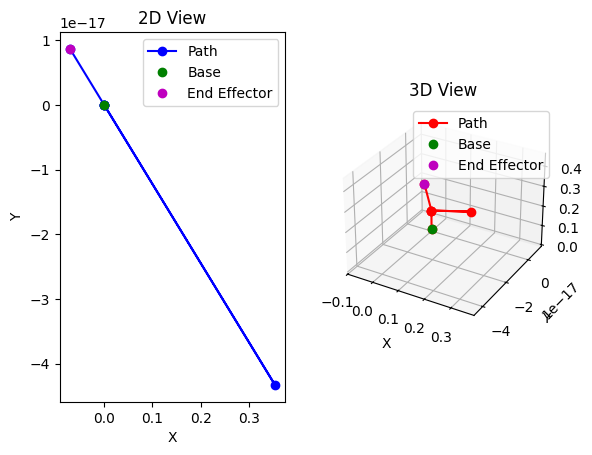

In [10]:
# Define symbolic variables
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")

# DH Parameters
d1, a1, alpha1 = 0.1, 0, pi / 2
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, pi / 2
d5, a5, alpha5 = 0.1, 0, 0


# Define the transformation matrix function using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix(
        [
            [
                cos(theta),
                -sin(theta) * cos(alpha),
                sin(theta) * sin(alpha),
                a * cos(theta),
            ],
            [
                sin(theta),
                cos(theta) * cos(alpha),
                -cos(theta) * sin(alpha),
                a * sin(theta),
            ],
            [0, sin(alpha), cos(alpha), d],
            [0, 0, 0, 1],
        ]
    )


#convert degrees to radians
theta1, theta2, theta3, theta4, theta5 = np.radians(theta_degrees)
angles = {theta1: theta1, theta2: theta2, theta3: theta3, theta4: theta4, theta5: theta5}

print(f"theta1: {theta1}")
print(f"theta2: {theta2}")
print(f"theta3: {theta3}")
print(f"theta4: {theta4}")
print(f"theta5: {theta5}")


# # Define joint angles in radians
# angles = {theta1: 0, theta2: 0, theta3: pi/2, theta4: -pi / 2, theta5: 0}

# Compute transformation matrices
T1 = DH_matrix(theta1, d1, a1, alpha1).subs(angles)
T2 = DH_matrix(theta2, d2, a2, alpha2).subs(angles)
T3 = DH_matrix(theta3, d3, a3, alpha3).subs(angles)
T4 = DH_matrix(theta4, d4, a4, alpha4).subs(angles)
T5 = DH_matrix(theta5, d5, a5, alpha5).subs(angles)

# Calculate cumulative transformations
T01 = T1
T02 = T01 * T2
T03 = T02 * T3
T04 = T03 * T4
T05 = T04 * T5

# Extract positions
positions = [
    Matrix([0, 0, 0, 1]),  # Base
    T01[:3, 3],
    T02[:3, 3],
    T03[:3, 3],
    T04[:3, 3],
    T05[:3, 3],  # End effector
]
positions = [N(p) for p in positions]  # Evaluate numerically

# Plotting
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

# 2D plot
x_vals = [p[0] for p in positions]
y_vals = [p[1] for p in positions]
ax1.plot(x_vals, y_vals, "bo-")
ax1.plot(x_vals[0], y_vals[0], "go")  # Base in green
ax1.plot(x_vals[-1], y_vals[-1], "mo")  # End effector in magenta
ax1.set_title("2D View")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.legend(["Path", "Base", "End Effector"])

# 3D plot
x_vals = [p[0] for p in positions]
y_vals = [p[1] for p in positions]
z_vals = [p[2] for p in positions]
ax2.plot(x_vals, y_vals, z_vals, "ro-")
ax2.plot(x_vals[0], y_vals[0], z_vals[0], "go")  # Base in green
ax2.plot(x_vals[-1], y_vals[-1], z_vals[-1], "mo")  # End effector in magenta
ax2.set_title("3D View")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.legend(["Path", "Base", "End Effector"])

plt.show()


## Robot with sliders 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, cos, sin, pi, Matrix, N
from ipywidgets import interact

# Define symbolic variables
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")

# DH Parameters
d1, a1, alpha1 = 0.1, 0, pi / 2
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, pi / 2
d5, a5, alpha5 = 0.1, 0, 0

# Define the transformation matrix function using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix([
        [
            cos(theta),
            -sin(theta) * cos(alpha),
            sin(theta) * sin(alpha),
            a * cos(theta),
        ],
        [
            sin(theta),
            cos(theta) * cos(alpha),
            -cos(theta) * sin(alpha),
            a * sin(theta),
        ],
        [0, sin(alpha), cos(alpha), d],
        [0, 0, 0, 1],
    ])

def plot_robot(theta1_val=0, theta2_val=0, theta3_val=0, theta4_val=0, theta5_val=0):
    angles = {theta1: theta1_val * pi / 180, theta2: theta2_val * pi / 180, theta3: theta3_val * pi / 180, theta4: theta4_val * pi / 180, theta5: theta5_val * pi / 180}
    
    # Compute transformation matrices
    T1 = DH_matrix(theta1, d1, a1, alpha1).subs(angles)
    T2 = DH_matrix(theta2, d2, a2, alpha2).subs(angles)
    T3 = DH_matrix(theta3, d3, a3, alpha3).subs(angles)
    T4 = DH_matrix(theta4, d4, a4, alpha4).subs(angles)
    T5 = DH_matrix(theta5, d5, a5, alpha5).subs(angles)
    
    # Calculate cumulative transformations
    T01 = T1
    T02 = T01 * T2
    T03 = T02 * T3
    T04 = T03 * T4
    T05 = T04 * T5
    
    # Extract positions
    positions = [
        Matrix([0, 0, 0, 1]),  # Base
        T01[:3, 3],
        T02[:3, 3],
        T03[:3, 3],
        T04[:3, 3],
        T05[:3, 3],  # End effector
    ]
    positions = [N(p) for p in positions]  # Evaluate numerically
    
    # Plotting
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection="3d")
    
    # 2D plot
    x_vals = [p[0] for p in positions]
    y_vals = [p[1] for p in positions]
    ax1.plot(x_vals, y_vals, "bo-")
    ax1.plot(x_vals[0], y_vals[0], "go")  # Base in green
    ax1.plot(x_vals[-1], y_vals[-1], "mo")  # End effector in magenta
    ax1.set_title("2D View")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    
    # 3D plot
    z_vals = [p[2] for p in positions]
    ax2.plot(x_vals, y_vals, z_vals, "ro-")
    ax2.plot(x_vals[0], y_vals[0], z_vals[0], "go")  # Base in green
    ax2.plot(x_vals[-1], y_vals[-1], z_vals[-1], "mo")  # End effector in magenta
    ax2.set_title("3D View")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    
    plt.show()

# Create sliders for each joint angle
interact(plot_robot, theta1_val=(-180, 180), theta2_val=(-180, 180), theta3_val=(-180, 180), theta4_val=(-180, 180), theta5_val=(-180, 180));


interactive(children=(IntSlider(value=0, description='theta1_val', max=180, min=-180), IntSlider(value=0, desc…